In [1]:
import pandas as pd

df = pd.read_csv('../data/crash_report.csv')


# Cleaning and Processing Data

# Columns to keep 
features = [
    'crash_date', 'crash_time', 'crash_speed_limit',
    'road_constr_zone_fl', 'crash_sev_id',
    'pedestrian_fl', 'motor_vehicle_fl', 'motorcycle_fl', 'bicycle_fl', 'other_fl',
    'onsys_fl',  'micromobility_serious_injury_count', 'micromobility_death_count',
]

response_variable = ["crash_fatal_fl"]

df_ = df[features]

# Convert date into crash year and crash month
# Convert the 'crash_date_time' column to a datetime object
df_['crash_date'] = pd.to_datetime(df['crash_date'])
df_['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M:%S')

# Create a new column 'hour' with the hour
df['hour'] = df_['crash_time'].dt.hour

# Create new columns for month, year, date and hour
df_['month'] = df_['crash_date'].dt.month
df_['year'] = df_['crash_date'].dt.year
df_['day'] = df_['crash_date'].dt.day
df_['time'] = df_['crash_time'].dt.hour

# drop time and date 

try:
    df_.drop(['crash_date', 'crash_time'], axis=1, inplace=True)
    print("Columns dropped successfully.")
except KeyError:
    print("Already dropped.")
    
# Replace nan values with N
df_.fillna('N', inplace=True)

# Replace Y with 1 and N with 0

replace_dict = {"Y" : 1, "N" : 0}
df_.replace(replace_dict, inplace = True)




/var/folders/v9/0831km2x19b76rb92cr5l_hc0000gn/T/ipykernel_72607/3916165110.py:3: DtypeWarning: Columns (7,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/crash_report.csv')
/var/folders/v9/0831km2x19b76rb92cr5l_hc0000gn/T/ipykernel_72607/3916165110.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['crash_date'] = pd.to_datetime(df['crash_date'])
/var/folders/v9/0831km2x19b76rb92cr5l_hc0000gn/T/ipykernel_72607/3916165110.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Columns dropped successfully.


/var/folders/v9/0831km2x19b76rb92cr5l_hc0000gn/T/ipykernel_72607/3916165110.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.fillna('N', inplace=True)
/var/folders/v9/0831km2x19b76rb92cr5l_hc0000gn/T/ipykernel_72607/3916165110.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.replace(replace_dict, inplace = True)


/Users/thangtruong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


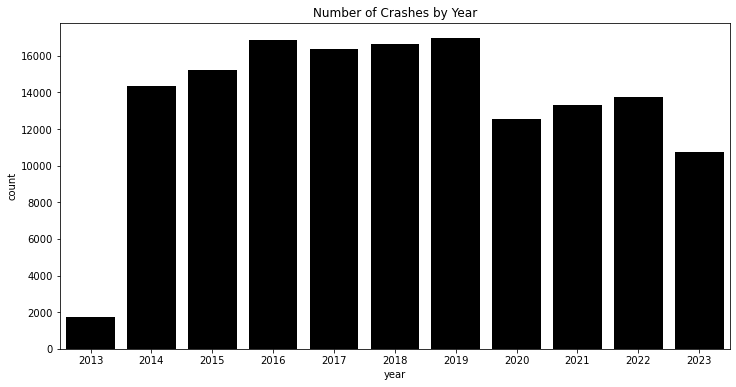

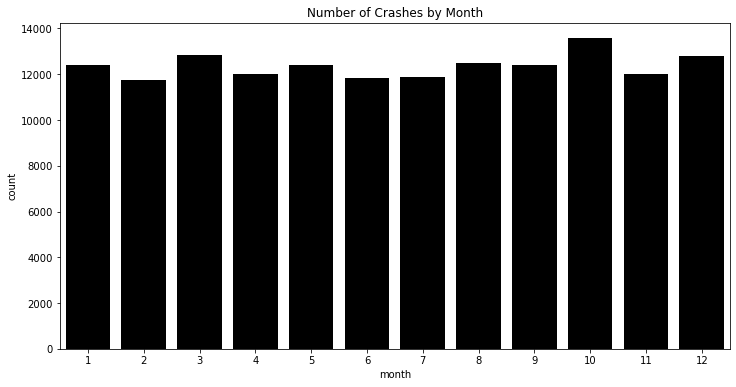

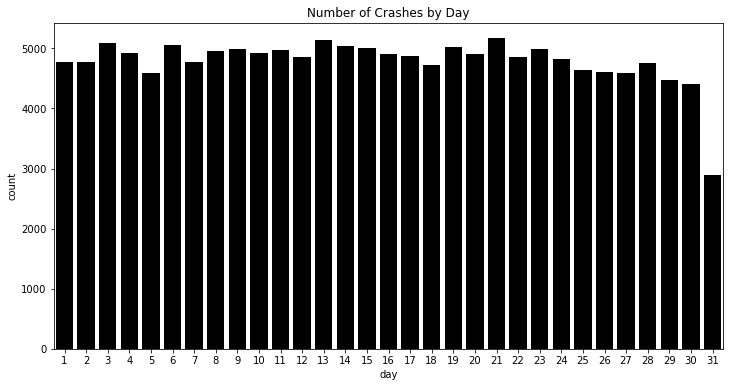

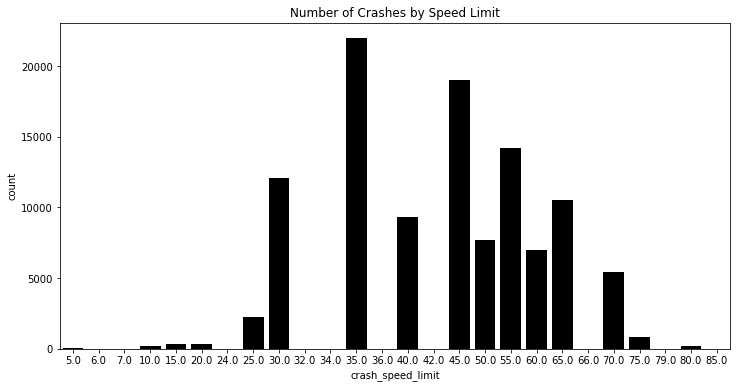

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'year', 'month', 'day', and 'crash_speed_limit' are column names in your DataFrame

# Number of Crashes by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_, color='black')
plt.title('Number of Crashes by Year')
plt.show()

# Number of Crashes by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df_, color='black')
plt.title('Number of Crashes by Month')
plt.show()

# Number of Crashes by Day
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=df_, color='black')
plt.title('Number of Crashes by Day')
plt.show()

# Number of Crashes by Speed Limit
df_new = df_[df_['crash_speed_limit'] > 0]
plt.figure(figsize=(12, 6))
sns.countplot(x='crash_speed_limit', data=df_new, color='black')
plt.title('Number of Crashes by Speed Limit')
plt.show()


In [3]:
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame
# Make sure you have a column named 'crash_speed_limit' in your DataFrame

# Calculate the counts for each speed limit
speed_limit_counts = df_new['crash_speed_limit'].value_counts()

# Sort the counts by speed limit
speed_limit_counts = speed_limit_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(speed_limit_counts.index, speed_limit_counts.values, width=bar_width, align='center', color = 'black')

# Add title and labels
plt.title('Number of Crashes by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Crashes')

speed_limit_counts_index = [x for x in speed_limit_counts.index if speed_limit_counts[x] > 10]

plt.xticks(speed_limit_counts_index)

plt.savefig('crash_speed_plot.png')

# Show the plot
plt.show()


NameError: name 'bar_width' is not defined

<Figure size 864x432 with 0 Axes>